In [4]:
!pip install nxviz=='0.6.3'

In [5]:
import networkx as nx
import pandas as pd
import nxviz as nv
import matplotlib.pyplot as plt

In [6]:
df_airports = pd.read_csv('airports.csv')
df_flights = pd.read_csv('anac.csv')

# Create graph
G = nx.Graph()

# Add nodes
for index, row in df_airports.iterrows():
    G.add_node(row['code'],
               name=row['name'],
               country=row['country'],
               latitude=row['lat_geo_point'],
               longitude=row['lon_geo_point'],
               region=row['region']
               )

# Add edges
df_edges = df_flights[[
    'origin_airport_abbreviation',
    'destination_airport_abbreviation',
]].dropna()
df_edges = df_edges.groupby(df_edges.columns.tolist(), as_index=False).size()
for index, row in df_edges.iterrows():
    if row['origin_airport_abbreviation'] == row['destination_airport_abbreviation']:
        continue
    G.add_edge(row['origin_airport_abbreviation'], row['destination_airport_abbreviation'], flight_count=row['size'])

# Export to graphml
nx.write_graphml(G, 'air_traffic.graphml')

Lendo arquivo graphml contendo a malha aerea do mundo

In [7]:
G = nx.read_graphml('air_traffic.graphml')

In [8]:
G.nodes

NodeView(('KDFW', 'KIAH', 'KJFK', 'KMIA', 'SBBR', 'SBCF', 'SBEG', 'SBGL', 'SBGR', 'SBRF', 'SBSV', 'TJSJ', 'KFLL', 'SBGO', 'TNCA', 'SBKP', 'SBCT', 'SBPA', 'KLAX', 'CYYZ', 'GOOY', 'MREC', 'SAZN', 'EGNX', 'EGPK', 'LIMF', 'LPPR', 'LEMD', 'LEMG', 'MTPP', 'LIMC', 'LIRF', 'SBFZ', 'SBMO', 'SBNT', 'GVAC', 'LFPG', 'LFBD', 'MMMX', 'MMUN', 'SPIM', 'SKBO', 'SABE', 'SAEZ', 'SARI', 'SBFL', 'SBPS', 'nan', 'EGSS', 'FACT', 'EGGW', 'MMMY', 'SBCB', 'SCEL', 'SGAS', 'KCLT', 'CYOW', 'DGAA', 'MUHA', 'SUMU', 'UUWW', 'GCRR', 'LFBO', 'SBAE', 'SBAR', 'SBAU', 'SBAX', 'SBBE', 'SBCA', 'SBCG', 'SBCH', 'SBCN', 'SBCX', 'SBCY', 'SBDN', 'SBDO', 'SBFI', 'SBIL', 'SBIP', 'SBJP', 'SBJU', 'SBJV', 'SBLO', 'SBMG', 'SBML', 'SBNF', 'SBPJ', 'SBPL', 'SBPV', 'SBQV', 'SBRJ', 'SBRP', 'SBSJ', 'SBSL', 'SBSP', 'SBSR', 'SBTE', 'SBUL', 'SBUR', 'SBVT', 'SBZM', 'SBBH', 'SBBV', 'SBCM', 'SBJI', 'SBMK', 'SBAT', 'SBCJ', 'SBHT', 'SBMA', 'SBRB', 'SBSN', 'SBTB', 'SBTC', 'SBDB', 'SBPK', 'SBCR', 'SWLC', 'SBJF', 'SBPF', 'SWSI', 'SBTV', 'SWRD', 'SBAQ',

Selecionando apenas os aeroportos do Brasil

In [9]:
SG = G.subgraph([n for n, attrdict in G.nodes.items() if attrdict['country'] == "BRASIL"])

In [10]:
SG.nodes(data=True)

NodeDataView({'SBJP': {'name': 'SANTA RITA', 'country': 'BRASIL', 'latitude': '-7.145833015440001', 'longitude': '-34.9486122131', 'region': 'NORDESTE'}, 'SNLA': {'name': 'PARAUAPEBAS', 'country': 'BRASIL', 'latitude': '-6.567500114440918', 'longitude': '-49.719444274902344', 'region': 'NORTE'}, 'SSPG': {'name': 'PARANAGUÁ', 'country': 'BRASIL', 'latitude': '-25.54010009765625', 'longitude': '-48.53120040893555', 'region': 'SUL'}, 'SBTV': {'name': 'PORTO SEGURO', 'country': 'BRASIL', 'latitude': '-16.54083251953125', 'longitude': '-39.1077766418457', 'region': 'NORDESTE'}, 'SNUB': {'name': 'UBÁ', 'country': 'BRASIL', 'latitude': '-21.121000289916992', 'longitude': '-42.881900787353516', 'region': 'SUDESTE'}, 'SNPG': {'name': 'PORTO GRANDE', 'country': 'BRASIL', 'latitude': '0.866388976574', 'longitude': '-51.4006004333', 'region': 'NORTE'}, 'SWJI': {'name': 'JI-PARANÁ', 'country': 'BRASIL', 'latitude': '-10.870800018299999', 'longitude': '-61.8465003967', 'region': 'NORTE'}, 'SBCB': {'

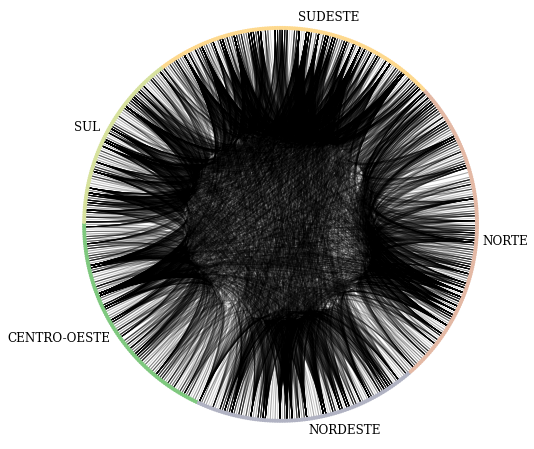

In [12]:
c = nv.CircosPlot(SG,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,
                  figsize=(10,8),
                  fontsize=12)

# Draw c to the screen
c.draw()


# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

In [13]:
nx.attribute_assortativity_coefficient(SG, 'region')

0.37029515963671145

In [14]:
nx.attribute_mixing_matrix(SG, 'region')

array([[0.07907186, 0.05564316, 0.02061275, 0.01329128, 0.01058797],
       [0.05564316, 0.17368777, 0.02782158, 0.03987385, 0.03424195],
       [0.02061275, 0.02782158, 0.13471503, 0.00720883, 0.02241496],
       [0.01329128, 0.03987385, 0.00720883, 0.07096193, 0.0121649 ],
       [0.01058797, 0.03424195, 0.02241496, 0.0121649 , 0.05384096]])

Quantos componentes conectados existem na malha aérea brasileira?

In [16]:
nx.is_connected(SG)

False

In [17]:
nx.number_connected_components(SG)

5

 A quantidade de aeroportos e a porcentagem por região

In [41]:
df_airports_sort_by_code = df_airports.set_index('code')

for component in nx.connected_components(SG):
    regions = {
        "SUDESTE": 0,
        "NORDESTE": 0,
        "CENTRO-OESTE": 0,
        "NORTE": 0,
        "SUL": 0
    }

    print("Total de aeroportos:", len(component))
    
    # Contabilizando quantidade de aerportos por região
    for airport_name in component:
        regions[df_airports_sort_by_code.loc[airport_name]['region']] += 1

    for region in regions:
        regions[region] /= len(component)
        print(region, ":", regions[region])

    print("\n")

Total de aeroportos: 497
SUDESTE : 0.23340040241448692
NORDESTE : 0.1851106639839034
CENTRO-OESTE : 0.18108651911468812
NORTE : 0.2535211267605634
SUL : 0.14688128772635814


Total de aeroportos: 1
SUDESTE : 0.0
NORDESTE : 0.0
CENTRO-OESTE : 1.0
NORTE : 0.0
SUL : 0.0


Total de aeroportos: 1
SUDESTE : 1.0
NORDESTE : 0.0
CENTRO-OESTE : 0.0
NORTE : 0.0
SUL : 0.0


Total de aeroportos: 1
SUDESTE : 0.0
NORDESTE : 0.0
CENTRO-OESTE : 0.0
NORTE : 1.0
SUL : 0.0


Total de aeroportos: 1
SUDESTE : 0.0
NORDESTE : 0.0
CENTRO-OESTE : 0.0
NORTE : 1.0
SUL : 0.0




Selecionando as cidades para simular cenários de viagens entre as 5 regiões
- SNCX (SUDESTE) COLATINA ES
- SSAE (SUL) ARROIO GRANDE RS
- SBRF (NORDESTE) RECIFE RN 
- SBBE (NORTE) BELÉM PA
- SBCG (CENTRO-OESTE) CAMPO GRANDE MS

Cenário 1
BELÉM (NORTE) para ARROIO GRANDE (SUL)

In [61]:
for airport_name in nx.shortest_path(SG, 'SBBE', 'SSAE'):
    print(df_airports_sort_by_code.loc[airport_name]['name'])

BELÉM
GUARULHOS
ARROIO GRANDE


Cenário 2
ARROIO GRANDE (SUL) para RECIFE (NORDESTE)

In [62]:
for airport_name in nx.shortest_path(SG, 'SSAE', 'SBRF'):
    print(df_airports_sort_by_code.loc[airport_name]['name'])

ARROIO GRANDE
GUARULHOS
RECIFE


Cenário 3
RECIFE (NORDESTE) para CAMPO GRANDE (CENTRO-OESTE)

In [63]:
for airport_name in nx.shortest_path(SG, 'SBRF', 'SBCG'):
    print(df_airports_sort_by_code.loc[airport_name]['name'])

RECIFE
CAMPO GRANDE


Cenário 4
CAMPO GRANDE (CENTRO-OESTE) para COLATINA (SUDESTE) 

In [64]:
for airport_name in nx.shortest_path(SG, 'SBCG', 'SNCX'):
    print(df_airports_sort_by_code.loc[airport_name]['name'])

CAMPO GRANDE
VITÓRIA
COLATINA
